# Planar data classificatin

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [4]:
class NeuralNetwork:
 
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
 
        # Initialize parameters
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01
        self.b2 = np.zeros((output_size, 1))
    
    def forward_propagation(self, X):
        # Forward pass
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = np.tanh(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2
 
    def backward_propagation(self, X, Y):
        m = X.shape[1]  # Number of samples
 
        # Backward pass
        dZ2 = self.A2 - Y
        dW2 = (1 / m) * np.dot(dZ2, self.A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.dot(self.W2.T, dZ2) * (1 - np.power(self.A1, 2))  # derivative of tanh
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
 
        # Update parameters
        self.W2 -= dW2*0.01
        self.b2 -= db2*0.01
        self.W1 -= dW1*0.01
        self.b1 -= db1*0.01
 
    def train(self, X, Y, num_epochs):
        for epoch in range(num_epochs):
            # Forward propagation
            predictions = self.forward_propagation(X)
 
            # Compute cross-entropy loss
            loss = self.cross_entropy_loss(Y, predictions)
 
            # Backward propagation
            self.backward_propagation(X, Y)
 
            # Print the loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')
 
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
 
    def cross_entropy_loss(self, Y, A):
        m = Y.shape[1]  # Number of samples
        return -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

# 1st one

In [5]:
input_size=2
hidden_size=4
output_size=1
X=np.array([[0,0],[0,1],[1,0],[1,1]]).T
Y=np.array([[0,1,1,0]])
model = NeuralNetwork(input_size, hidden_size, output_size)
model.train(X, Y, num_epochs=1000)

Epoch 0, Loss: 0.6931471837705766
Epoch 100, Loss: 0.6931471834704299
Epoch 200, Loss: 0.693147183288433
Epoch 300, Loss: 0.6931471831780204
Epoch 400, Loss: 0.6931471831109786
Epoch 500, Loss: 0.6931471830702143
Epoch 600, Loss: 0.6931471830453708
Epoch 700, Loss: 0.6931471830301736
Epoch 800, Loss: 0.6931471830208206
Epoch 900, Loss: 0.6931471830150087


# 2nd one

In [6]:
X,Y=make_moons(n_samples=1000, noise=0.2, random_state=42)
X = X.T
Y = Y.reshape(1, -1)

Text(0.5, 1.0, 'Planar Data Classification Dataset')

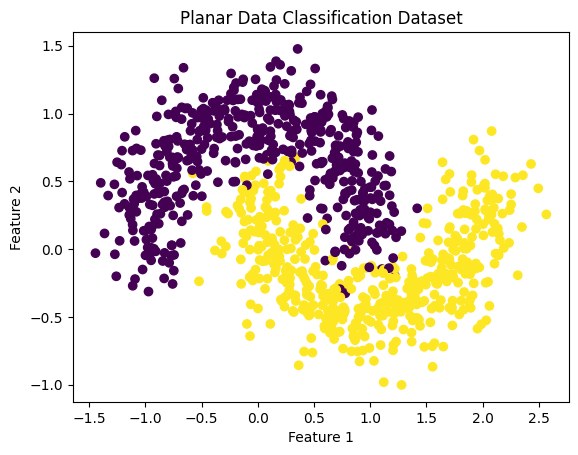

In [7]:
# Plot the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Planar Data Classification Dataset')

In [8]:
input_size = 2
hidden_size = 4
output_size = 1
model = NeuralNetwork(input_size, hidden_size, output_size)
model.train(X, Y, num_epochs=1000)

Epoch 0, Loss: 0.6931957389067958
Epoch 100, Loss: 0.6931235898359035
Epoch 200, Loss: 0.6930420061822399
Epoch 300, Loss: 0.6929178779034849
Epoch 400, Loss: 0.6927010499542265
Epoch 500, Loss: 0.6923044468536936
Epoch 600, Loss: 0.691570434168224
Epoch 700, Loss: 0.6902126654394288
Epoch 800, Loss: 0.6877193577537037
Epoch 900, Loss: 0.6832086624201609
